# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q=London&units=Imperial"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [4]:
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 64.31,
  'feels_like': 64.38,
  'temp_min': 60.37,
  'temp_max': 66.16,
  'pressure': 1010,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 240},
 'clouds': {'all': 100},
 'dt': 1627350741,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1627359414,
  'sunset': 1627415813},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
record_count = 0
set_count = 1
city_data = []
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units=Imperial"
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    record_count += 1
    if (record_count % 50== 0):
        record_count = 0
        set_count += 1 
    
    try:
        longitude = weather_json["coord"]["lon"]
        latitude = weather_json["coord"]["lat"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        windiness = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        city_data.append({"City": city,
                          "Lat": latitude,
                            "Lng": longitude,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloud,
                            "Wind Speed": windiness,
                            "Country": country,
                            "Date": date,
                            })
        
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...")
        record_count = record_count - 1
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | hermanus
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | kutum
City not found. Skipping...
Processing Record 10 of Set 1 | yongan
Processing Record 11 of Set 1 | khasan
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | arona
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | shubarkuduk
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | yellowknife
City not found. Skipping...
Processing Record 40 of Set 4 | miramar
Processing Record 41 of Set 4 | mogadouro
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | lucenec
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | pangkalanbuun
Processing Record 46 of Set 4 | burnie
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | ambulu
Processing Record 49 of Set 4 | yanai
City not found. Skipping...
Processing Record 0 of Set 6 | port hedland
Processing Record 1 of Set 6 | bilma
Processing Record 2 of Set 6 | klaksvik
Processing Record 3 of Set 6 | muriti
Processing Record 4 of Set 6 | taoudenni
Processing Record 5 of Set 6 | molchanovo
City not found. Skipping...
Processing Record 6 of Set 6 | novonukutskiy
Processing Record 7 of Set 6 | inhambane
Processing Record 8 of Set 

Processing Record 26 of Set 9 | qaqortoq
Processing Record 27 of Set 9 | borovoy
Processing Record 28 of Set 9 | aykhal
Processing Record 29 of Set 9 | xinmin
Processing Record 30 of Set 9 | shu
Processing Record 31 of Set 9 | asau
Processing Record 32 of Set 9 | yulara
Processing Record 33 of Set 9 | anloga
Processing Record 34 of Set 9 | puerto baquerizo moreno
Processing Record 35 of Set 9 | port blair
Processing Record 36 of Set 9 | kargasok
Processing Record 37 of Set 9 | gamba
Processing Record 38 of Set 9 | lokosovo
Processing Record 39 of Set 9 | tazovskiy
Processing Record 40 of Set 9 | san juan
Processing Record 41 of Set 9 | camacha
Processing Record 42 of Set 9 | esperance
Processing Record 43 of Set 9 | ancud
Processing Record 44 of Set 9 | florianopolis
Processing Record 45 of Set 9 | college
Processing Record 46 of Set 9 | timmins
Processing Record 47 of Set 9 | sorland
Processing Record 48 of Set 9 | manchester
Processing Record 49 of Set 9 | douglas
Processing Record 0

Processing Record 16 of Set 13 | tombouctou
Processing Record 17 of Set 13 | mendi
Processing Record 18 of Set 13 | sobolevo
Processing Record 19 of Set 13 | guerrero negro
Processing Record 20 of Set 13 | gorom-gorom
Processing Record 21 of Set 13 | inta
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,52.05,57,100,26.02,AU,1627350770
1,punta arenas,-53.1500,-70.9167,41.11,81,75,5.75,CL,1627350771
2,rikitea,-23.1203,-134.9692,74.75,80,98,17.38,PF,1627350771
3,vaini,-21.2000,-175.2000,77.16,83,75,11.50,TO,1627350771
4,torbay,47.6666,-52.7314,58.68,90,20,9.22,CA,1627350772


In [50]:
city_df.to_csv(output_data_file, index = False)

In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.054061,19.478075,69.450946,70.255692,53.751313,8.286637,1.627351e+09
std,33.708130,89.571941,13.440335,19.727026,39.845110,5.698669,8.363739e+01
min,-54.800000,-179.166700,33.460000,8.000000,0.000000,0.000000,1.627351e+09
25%,-6.799200,-63.049300,60.620000,58.000000,9.000000,4.025000,1.627351e+09
50%,27.916700,21.548200,70.560000,74.000000,58.000000,6.910000,1.627351e+09
75%,48.616400,96.268350,80.530000,85.000000,95.000000,11.225000,1.627351e+09
max,78.218600,179.316700,98.280000,100.000000,100.000000,37.020000,1.627351e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_df.loc[city_df["Humidity"] > 100, :]
# In this random draw of cities, there were no cities with humidity greater than 100.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Skip

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# skip

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Skip

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

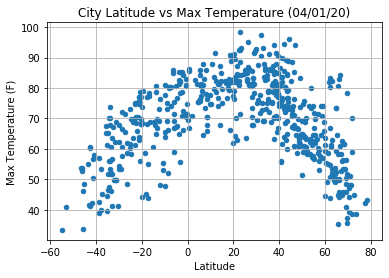

In [32]:
city_df.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "City Latitude vs Max Temperature (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

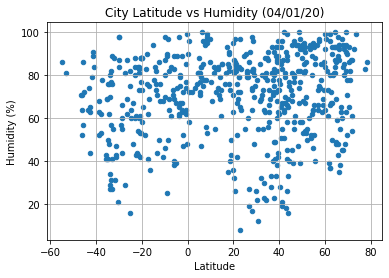

In [33]:
city_df.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

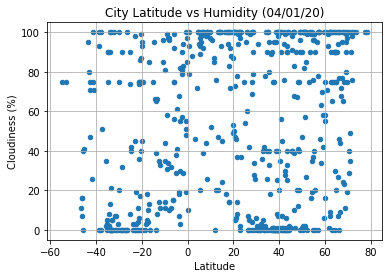

In [34]:
city_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

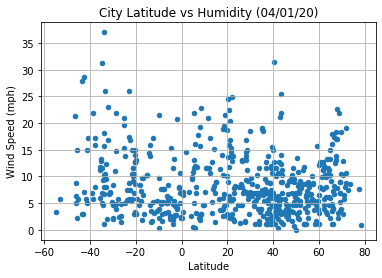

In [35]:
city_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Lat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [19]:
# Create dataframe of Northern and Southern Hemisphere
northern_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float)>0,:]
southern_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float)<0,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,52.05,57,100,26.02,AU,1627350770
1,punta arenas,-53.1500,-70.9167,41.11,81,75,5.75,CL,1627350771
2,rikitea,-23.1203,-134.9692,74.75,80,98,17.38,PF,1627350771
3,vaini,-21.2000,-175.2000,77.16,83,75,11.50,TO,1627350771
6,chuy,-33.6971,-53.4616,46.33,82,0,8.01,UY,1627350772


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6643196690317965


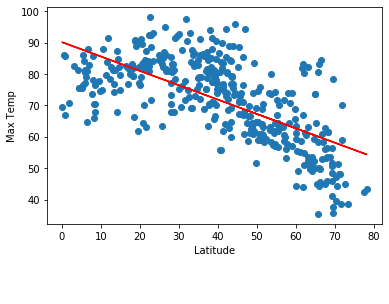

In [36]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_MaxTemp.png")
plt.show()

The r-value is: 0.46937863826630627


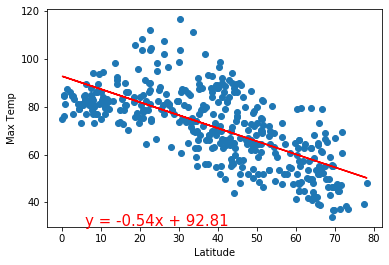

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6863288808294166


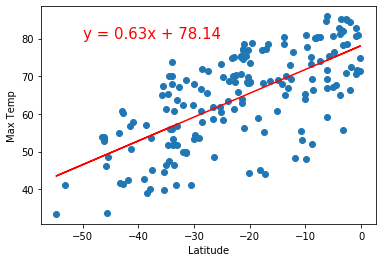

In [47]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_MaxTemp.png")
plt.show()

The r-value is: 0.6082708688906918


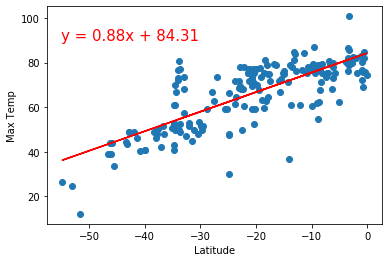

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01900059433086799


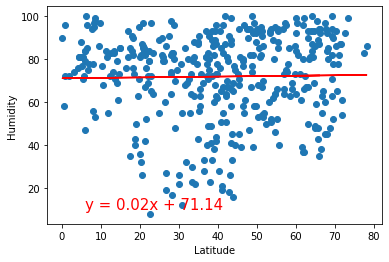

In [38]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_Humidity.png")
plt.show()

The r-value is: 0.000543987878808455


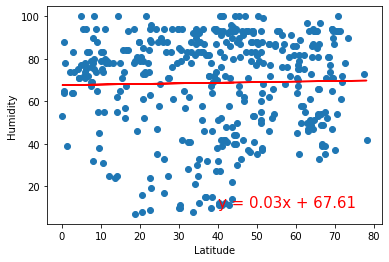

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1318771097790377


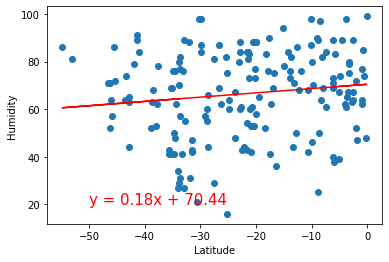

In [48]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_Humidity.png")
plt.show()

The r-value is: 0.014985174297345524


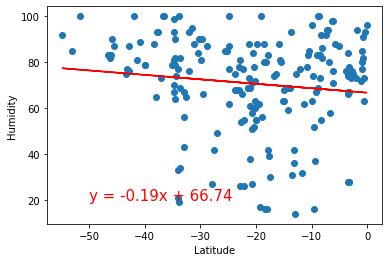

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.022949693695594794


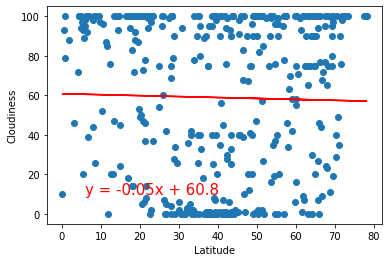

In [40]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_Cloudiness.png")
plt.show()

The r-value is: 0.0020898727664228514


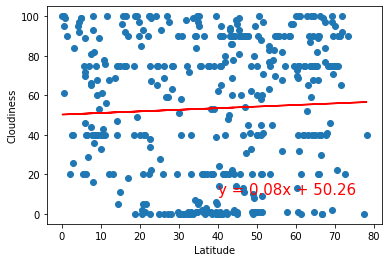

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1487385179086061


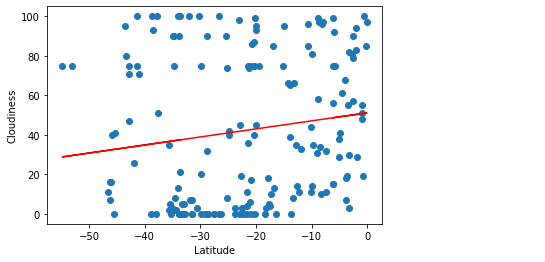

In [41]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_Cloudiness.png")
plt.show()

The r-value is: 0.0035263772085582894


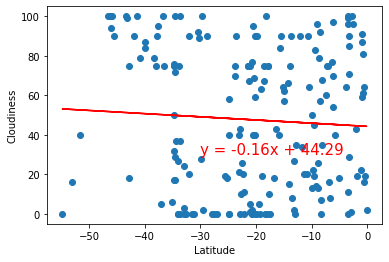

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.07816611632372228


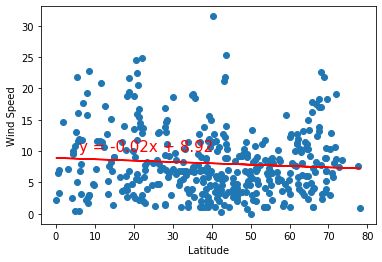

In [42]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_WindSpeed.png")
plt.show()

The r-value is: 0.04019723576144484


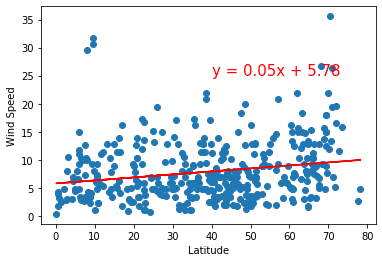

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.29270378080947773


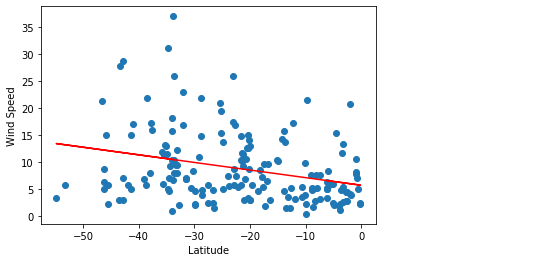

In [43]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_WindSpeed.png")
plt.show()

The r-value is: 0.017128274759839232


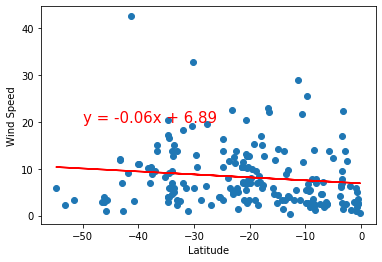